In [11]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

### Cell 3
Now it is your turn! Set each of the variables in this cell correctly. (They should no longer equal None.)

Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one. For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay is in the order that our test expects. For test_data_gen it will also be helpful to observe the directory structure.

After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 class.
```

In [4]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values from range [0, 255] to [0, 1]
)

validation_image_generator = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values from range [0, 255] to [0, 1]
)

test_image_generator = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values from range [0, 255] to [0, 1]
)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    PATH,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        classes=['test'],
        class_mode=None,
        shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


### Cell 4
The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot five random training images.

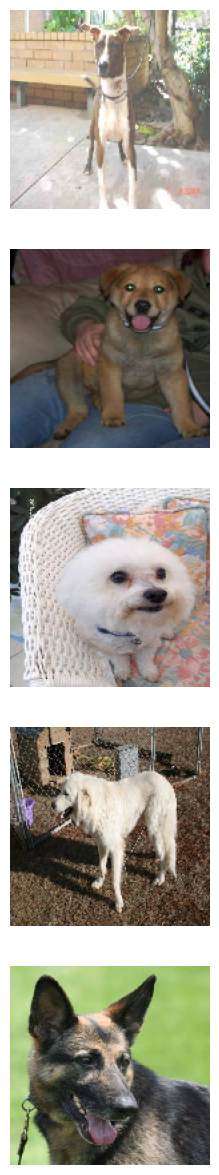

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


### Cell 5
Recreate the train_image_generator using ImageDataGenerator.

Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [6]:
# 5
train_image_generator = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


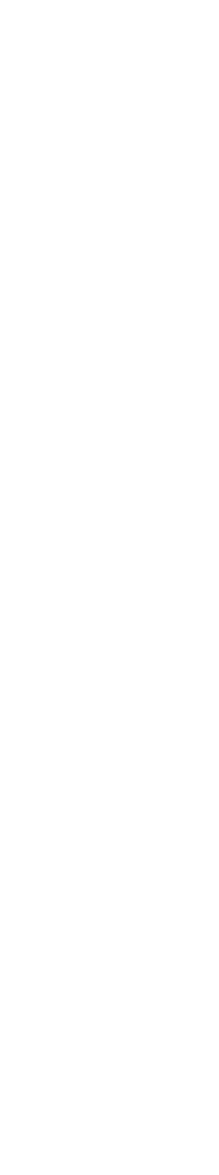

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

### Cell 7
In this cell, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [20]:
# 7
model = Sequential()

# Convolutions
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 33, 33, 128)      

### Cell 8
Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.



In [21]:
from math import ceil

train_steps = int(ceil(1. * total_train / batch_size))
val_steps = int(ceil(1. * total_val / batch_size))
print(train_steps, val_steps)

16 8


In [22]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_steps,
    validation_data=val_data_gen,
    validation_steps=val_steps,
    epochs=epochs)

Epoch 1/100
16/16 [==============================] - 189s 12s/step - loss: 0.7691 - accuracy: 0.4900 - val_loss: 0.7431 - val_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 199s 12s/step - loss: 0.7145 - accuracy: 0.4850 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 3/100
16/16 [==============================] - 199s 12s/step - loss: 0.6968 - accuracy: 0.4910 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 205s 13s/step - loss: 0.6949 - accuracy: 0.4990 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 180s 11s/step - loss: 0.7023 - accuracy: 0.5080 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 200s 13s/step - loss: 0.7056 - accuracy: 0.4730 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 7/100
16/16 [==============================] - 200s 12s/step - loss: 0.7066 - accuracy: 0.5160 - val_loss: 0.7252 - val_accuracy: 0.5000

### Cell 9
Run this cell to visualize the accuracy and loss of the model.

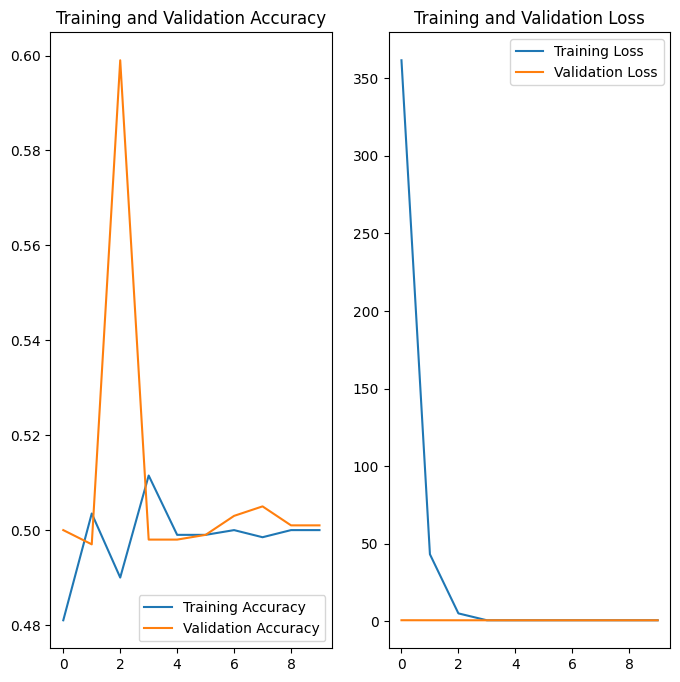

In [12]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Fine tuning the model

In [34]:
from tensorflow.keras.layers import BatchNormalization

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3,3)),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3,3), activation='relu'),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/10
15/15 [==============================] - 175s 12s/step - loss: 0.6996 - accuracy: 0.5027 - val_loss: 0.6992 - val_accuracy: 0.4922
Epoch 2/10
15/15 [==============================] - 172s 11s/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 174s 12s/step - loss: 0.6929 - accuracy: 0.5224 - val_loss: 0.6930 - val_accuracy: 0.5893
Epoch 4/10
15/15 [==============================] - 174s 12s/step - loss: 0.6881 - accuracy: 0.5379 - val_loss: 0.6958 - val_accuracy: 0.5033
Epoch 5/10
15/15 [==============================] - 172s 11s/step - loss: 0.6855 - accuracy: 0.5524 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 6/10
15/15 [==============================] - 173s 12s/step - loss: 0.6827 - accuracy: 0.5620 - val_loss: 0.6928 - val_accuracy: 0.5067


### Cell 10
Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

In [35]:
probabilities = model.predict(test_data_gen).flatten()

probabilities

1/1 [==============================] - 2s 2s/step


array([0.4997884 , 0.49971136, 0.50049406, 0.50035983, 0.5001024 ,
       0.49994183, 0.49998882, 0.49985987, 0.5000251 , 0.5001439 ,
       0.4996766 , 0.50027406, 0.49956876, 0.50016755, 0.50006694,
       0.50005835, 0.50034684, 0.50029063, 0.50022995, 0.49987313,
       0.50018644, 0.5000942 , 0.49974   , 0.50040513, 0.5000116 ,
       0.5005131 , 0.50053483, 0.49952024, 0.5000227 , 0.49960575,
       0.4997797 , 0.5004732 , 0.50029707, 0.5004697 , 0.49968702,
       0.49955672, 0.500512  , 0.50008875, 0.49981424, 0.5000039 ,
       0.49962652, 0.5000523 , 0.50017935, 0.5000418 , 0.50040233,
       0.49960178, 0.4994264 , 0.4997239 , 0.49994788, 0.49981144],
      dtype=float32)

### Cell 11
Run this final cell to see if you passed the challenge or if you need to keep trying.

In [36]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
